In [1]:
import random

# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, algorithms, base, creator
from tqdm import tqdm
import seaborn as sns

sys.path.append("../")
from calculus.term import Var, Atom, Application, Abstraction
from calculus.strategy import (
    LeftmostOutermostStrategy,
    LeftmostInnermostStrategy,
    RightmostInnermostStrategy,
    RightmostOutermostStrategy,
    RandomStrategy,
    MixedStrategy,
)
from calculus.generation import genTerm

In [3]:
UPLIMIT = 60
DOWNLIMIT = 50

LAMBDA_TERM_COUNT = 100

RANDOM_AVERAGE_COUNT = 20


def filterTerms(term):
    return term and DOWNLIMIT < term.verticesNumber < UPLIMIT


def flatten(t):
    return [item for sublist in t for item in sublist]


terms = flatten(
    [
        list(filter(filterTerms, [genTerm(p, UPLIMIT) for i in range(7000)]))
        for p in np.arange(0.49, 0.51, 0.02)
    ]
)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

stepsLO = list(map(lambda term: term.normalize(LeftmostOutermostStrategy())[1], terms))
print("number of steps to normalize using LO strategy= {}".format(stepsLO))

terms_with_normal_form = []
stepsLO_temp = []
for i, term in enumerate(terms):
    if stepsLO[i] != float("inf"):
        terms_with_normal_form.append(term)
        stepsLO_temp.append(stepsLO[i])
terms = terms_with_normal_form[:LAMBDA_TERM_COUNT]
stepsLO = stepsLO_temp[:LAMBDA_TERM_COUNT]

print(f"number of terms with normal form {len(terms)}")
assert len(terms) == LAMBDA_TERM_COUNT

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [
    sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

number of lambda terms 225
number of vertices= [57, 55, 54, 52, 54, 59, 55, 54, 53, 56, 59, 52, 58, 52, 58, 54, 55, 57, 58, 51, 56, 54, 53, 51, 57, 56, 56, 58, 59, 56, 54, 54, 52, 55, 53, 59, 51, 53, 54, 53, 51, 57, 54, 58, 58, 52, 53, 54, 58, 57, 57, 52, 57, 54, 56, 57, 51, 58, 53, 52, 52, 57, 58, 53, 54, 52, 56, 56, 55, 52, 52, 52, 53, 51, 58, 58, 58, 51, 53, 58, 53, 57, 59, 58, 57, 56, 53, 55, 52, 56, 56, 51, 57, 53, 52, 56, 53, 57, 53, 57, 59, 55, 52, 51, 52, 55, 57, 56, 58, 54, 53, 53, 55, 52, 54, 57, 54, 55, 58, 58, 54, 52, 57, 51, 57, 54, 59, 52, 58, 57, 52, 54, 59, 56, 57, 52, 52, 52, 57, 54, 57, 53, 53, 58, 56, 53, 51, 55, 59, 58, 56, 53, 55, 57, 52, 57, 56, 52, 51, 56, 59, 59, 57, 52, 54, 52, 53, 51, 59, 59, 58, 51, 58, 56, 52, 58, 53, 55, 58, 54, 55, 55, 57, 54, 57, 57, 58, 59, 52, 58, 53, 51, 54, 55, 59, 58, 59, 56, 58, 56, 58, 54, 57, 51, 51, 51, 57, 53, 54, 54, 58, 55, 52, 56, 51, 59, 54, 58, 57, 53, 54, 55, 55, 58, 51]
number of redexes= [5, 7, 4, 9, 7, 6, 4, 6, 3, 7, 6,

In [4]:
def draw_hist(data):
    steps = [x for x in data if x != float("inf")]

    distributions = get_common_distributions()
    distributions.remove("expon")
    distributions.remove("cauchy")
    f = Fitter(steps, distributions=distributions)
    f.fit()
    summary = f.summary()
    distribution = f.get_best(method="sumsquare_error")

    print("==============")
    print(f"number of not normalized terms: {len(data) - len(steps)}")
    print(summary)
    print(distribution)
    print(f'Norm distribution: {f.fitted_param["norm"]}')
    print("==============")
    plt.xlabel("Number of reduction steps")
    plt.show()

    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()
    mu, sigma = f_ln.fitted_param["norm"]
    print(
        f"Log Norm distribution params: ({mu}, {sigma}); expected value = {np.e ** (mu + (sigma ** 2) / 2)}"
    )

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 39.60it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.007942  1453.151720 -930.258998     inf      0.100793   
chi2             0.014955  1513.291338 -866.971128     inf      0.223233   
exponpow         0.020510  1150.511439 -835.387744     inf      0.374335   
powerlaw         0.025364  1185.155978 -814.144519     inf      0.374020   
rayleigh         0.031280  1947.071090 -797.783309     inf      0.347275   

             ks_pvalue  
lognorm   2.446723e-01  
chi2      7.373430e-05  
exponpow  4.322175e-13  
powerlaw  4.546131e-13  
rayleigh  2.793236e-11  
{'lognorm': {'s': 1.110302435699274, 'loc': 0.42024585286616845, 'scale': 5.842401853195845}}
Norm distribution: (11.89, 20.726261119652044)


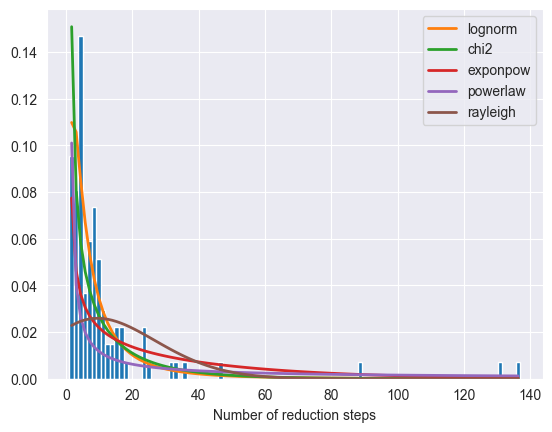

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.30it/s]

Log Norm distribution params: (1.879940211204093, 0.9977012908624534); expected value = 10.779478030134486


In [6]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 37.37it/s]


number of not normalized terms: 1
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.429378   906.664147 -524.827881     inf      0.100725   
chi2             0.429706   913.881024 -524.752219     inf      0.100483   
gamma            0.429706   913.878690 -524.752181     inf      0.100486   
rayleigh         0.431825   979.652991 -528.860337     inf      0.124180   
norm             0.440784  1051.925386 -526.827377     inf      0.131055   

          ks_pvalue  
lognorm    0.250358  
chi2       0.252819  
gamma      0.252792  
rayleigh   0.086559  
norm       0.060764  
{'lognorm': {'s': 0.4499569055091276, 'loc': -2.2653345268774174, 'scale': 10.976046788199795}}
Norm distribution: (9.88888888888889, 5.879065563229009)


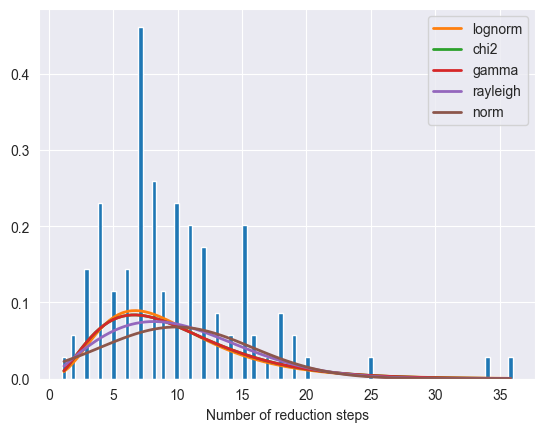

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.66it/s]

Log Norm distribution params: (2.124366338710059, 0.602571054592757); expected value = 10.03332724851836


In [7]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 32.78it/s]


number of not normalized terms: 1
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.012581  1221.996318 -874.314449     inf      0.051846   
chi2             0.015756  1290.215388 -852.033949     inf      0.087786   
exponpow         0.029059  1255.275516 -791.436556     inf      0.205667   
rayleigh         0.029807  1575.949620 -793.514301     inf      0.220044   
norm             0.038079  1605.347787 -769.267431     inf      0.209803   

          ks_pvalue  
lognorm    0.940258  
chi2       0.407000  
exponpow   0.000377  
rayleigh   0.000109  
norm       0.000266  
{'lognorm': {'s': 0.7750853034916672, 'loc': 0.18646471276426552, 'scale': 7.691529547767843}}
Norm distribution: (10.786868686868688, 11.080656058182049)


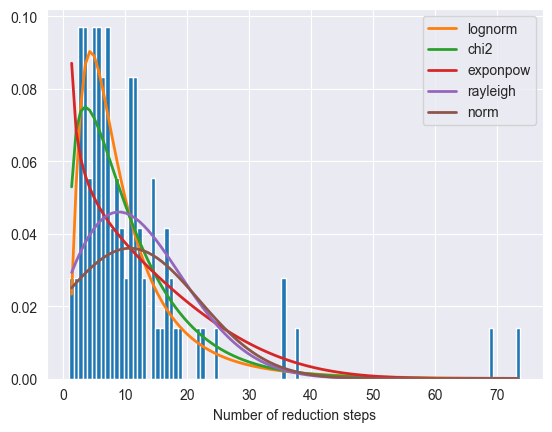

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 31.49it/s]

Log Norm distribution params: (2.0718464684526, 0.7513670520129762); expected value = 10.52888772990645


In [8]:
draw_hist(stepsRand)

In [9]:
results = []
values = list(range(0, 101, 5))
for p_lo in tqdm(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [
        sum(
            [
                term.normalize(
                    MixedStrategy(
                        [LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p
                    )
                )[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    results.append(result)

plt.plot(values, results)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

  0%|          | 0/21 [29:41<?, ?it/s]


KeyboardInterrupt: 

In [25]:
saved_terms = terms

In [28]:
arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(arr[:7])
print(arr[8:])

[0, 1, 2, 3, 4, 5, 6]
[8, 9, 10, 11, 12]


In [29]:
terms = saved_terms[:70] + saved_terms[71:]

In [30]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 5))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [
        sum(
            [
                term.normalize(
                    MixedStrategy(
                        [LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p
                    )
                )[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in tqdm(terms, desc=f"it {inx} / {iters}")
    ]
    steps_mixed_all.append(steps)


it 0 / 20: 100%|██████████| 99/99 [00:03<00:00, 30.99it/s]

it 1 / 20: 100%|██████████| 99/99 [00:03<00:00, 29.93it/s]

it 2 / 20: 100%|██████████| 99/99 [00:03<00:00, 28.57it/s]

it 3 / 20: 100%|██████████| 99/99 [00:03<00:00, 27.51it/s]

it 4 / 20: 100%|██████████| 99/99 [00:04<00:00, 23.11it/s]

it 5 / 20: 100%|██████████| 99/99 [00:04<00:00, 23.68it/s]

it 6 / 20: 100%|██████████| 99/99 [00:04<00:00, 23.20it/s]

it 7 / 20: 100%|██████████| 99/99 [00:05<00:00, 18.20it/s]

it 8 / 20: 100%|██████████| 99/99 [00:05<00:00, 18.75it/s]

it 9 / 20: 100%|██████████| 99/99 [00:05<00:00, 16.72it/s]

it 10 / 20: 100%|██████████| 99/99 [00:07<00:00, 13.70it/s]

it 11 / 20: 100%|██████████| 99/99 [00:06<00:00, 14.91it/s]

it 12 / 20: 100%|██████████| 99/99 [00:07<00:00, 13.06it/s]

it 13 / 20: 100%|██████████| 99/99 [00:07<00:00, 12.54it/s]

it 14 / 20: 100%|██████████| 99/99 [00:10<00:00,  9.59it/s]

it 15 / 20: 100%|██████████| 99/99 [00:09<00:00, 10.02it/s]

it 16 / 20: 100%|██████████| 99/9


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.93it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.61it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.13it/s]

Fitting 9 distributions:   0%|          | 0/9 [00:00<?, ?it/s]SKIPPED powerlaw distribution (taking more than 30 seconds)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.50it/s]

Fitting 9 distributions:   0%|          | 0/9 [00:00<?, ?it/s]SKIPPED powerlaw distribution (taking more than 30 seconds)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.82it/s]

Fitting 9 distributions:   0%|          | 0/9 [00:00<?, ?it/s]SKIPPED powerlaw distribution (taking more than 30 seconds)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]

Fitting 9 distributions:   0%|          | 0/9 [00:00<?

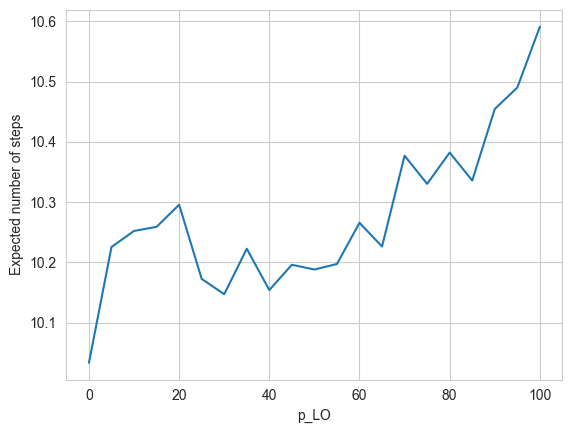

In [31]:
expected_values = []
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

In [32]:
steps_mixed_all = []
expected_values = []
values = list(range(0, 101, 1))
iters = len(values) - 1

for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [
        sum(
            [
                term.normalize(
                    MixedStrategy(
                        [LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p
                    )
                )[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in tqdm(terms, desc=f"it {inx} / {iters}")
    ]
    steps_mixed_all.append(steps)


it 0 / 100: 100%|██████████| 99/99 [00:03<00:00, 31.07it/s]

it 1 / 100: 100%|██████████| 99/99 [00:03<00:00, 31.28it/s]

it 2 / 100: 100%|██████████| 99/99 [00:03<00:00, 30.58it/s]

it 3 / 100: 100%|██████████| 99/99 [00:03<00:00, 29.16it/s]

it 4 / 100: 100%|██████████| 99/99 [00:03<00:00, 30.65it/s]

it 5 / 100: 100%|██████████| 99/99 [00:03<00:00, 30.27it/s]

it 6 / 100: 100%|██████████| 99/99 [00:03<00:00, 29.68it/s]

it 7 / 100: 100%|██████████| 99/99 [00:03<00:00, 28.86it/s]

it 8 / 100: 100%|██████████| 99/99 [00:03<00:00, 28.57it/s]

it 9 / 100: 100%|██████████| 99/99 [00:03<00:00, 26.44it/s]

it 10 / 100: 100%|██████████| 99/99 [00:03<00:00, 28.03it/s]

it 11 / 100: 100%|██████████| 99/99 [00:03<00:00, 28.62it/s]

it 12 / 100: 100%|██████████| 99/99 [00:03<00:00, 25.98it/s]

it 13 / 100: 100%|██████████| 99/99 [00:03<00:00, 27.85it/s]

it 14 / 100: 100%|██████████| 99/99 [00:03<00:00, 25.89it/s]

it 15 / 100: 100%|██████████| 99/99 [00:03<00:00, 25.36it/s]

it 16 / 100: 100%


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.56it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.21it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.12it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.99it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.70it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.03it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.

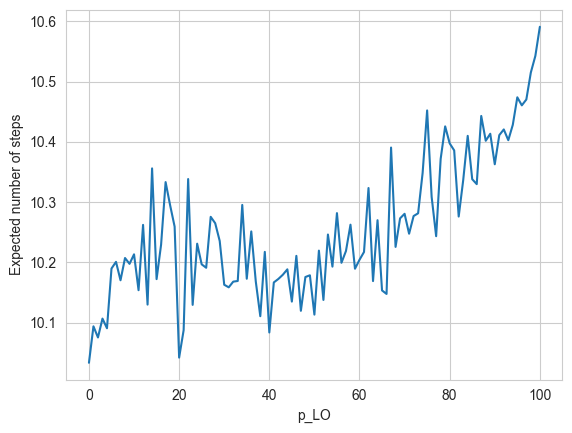

In [33]:
expected_values = []
for steps in steps_mixed_all:
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    expected_values.append(result)

plt.plot(values, expected_values)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

In [35]:
expected_values.index(min(expected_values))

0

In [10]:
def eaSimpleWithElitism(
    population,
    toolbox,
    cxpb,
    mutpb,
    ngen,
    stats=None,
    halloffame=None,
    verbose=__debug__,
):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.79it/s]


expected number of steps to normalize using Mixed strategy= 10.591195480770049


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.85it/s]


expected number of steps to normalize using Mixed strategy= 11.00947717793058


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 10.738051787305649


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 10.959514280182374


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 10.689881470055665


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.73it/s]


expected number of steps to normalize using Mixed strategy= 10.396665010805707


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 10.64276753209082


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.48it/s]


expected number of steps to normalize using Mixed strategy= 10.589067250831743


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.53it/s]


expected number of steps to normalize using Mixed strategy= 10.533358459017295


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 10.582004715698687


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.14it/s]


expected number of steps to normalize using Mixed strategy= 10.700516571443591


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 10.921069992441522


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.14it/s]


expected number of steps to normalize using Mixed strategy= 10.769190478084715


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.21it/s]


expected number of steps to normalize using Mixed strategy= 10.593003825600753


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.43it/s]


expected number of steps to normalize using Mixed strategy= 10.892109011813712


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.93it/s]


expected number of steps to normalize using Mixed strategy= 11.087762133246448


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.58it/s]


expected number of steps to normalize using Mixed strategy= 10.536936394148885


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.71it/s]


expected number of steps to normalize using Mixed strategy= 10.948817261755865


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.50it/s]


expected number of steps to normalize using Mixed strategy= 10.60395194484799


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.74it/s]


expected number of steps to normalize using Mixed strategy= 10.459889411226
gen	nevals	min    	avg    
0  	20    	10.3967	10.7123


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 10.65495405595447


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 10.72093042619974


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.12it/s]


expected number of steps to normalize using Mixed strategy= 10.557372741324102


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.21it/s]


expected number of steps to normalize using Mixed strategy= 10.89759308578331


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.46it/s]


expected number of steps to normalize using Mixed strategy= 10.402114222696856


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.62it/s]


expected number of steps to normalize using Mixed strategy= 10.73402245077717


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 10.78714906022695


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 10.555280834614479


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 10.378073454406566


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 10.794964849273686


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.14it/s]


expected number of steps to normalize using Mixed strategy= 10.435728477295182


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 10.592646834803652


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.20it/s]


expected number of steps to normalize using Mixed strategy= 10.641182614438023


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.29it/s]


expected number of steps to normalize using Mixed strategy= 10.583077286387919


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.24it/s]


expected number of steps to normalize using Mixed strategy= 10.245325392529677


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


expected number of steps to normalize using Mixed strategy= 10.529678135568732
1  	16    	10.2453	11.8117


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.74it/s]


expected number of steps to normalize using Mixed strategy= 10.47853941066783


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 10.56937989465662


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.61it/s]


expected number of steps to normalize using Mixed strategy= 10.39171723726135


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 10.39492520770858


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.46it/s]


expected number of steps to normalize using Mixed strategy= 10.43134474231693


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]


expected number of steps to normalize using Mixed strategy= 10.45523293522494


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.70it/s]


expected number of steps to normalize using Mixed strategy= 10.453378438844743


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.19it/s]


expected number of steps to normalize using Mixed strategy= 10.558228778202082


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 10.598937931397389


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 10.544099056990495


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.70it/s]


expected number of steps to normalize using Mixed strategy= 10.420595566788645


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.21it/s]


expected number of steps to normalize using Mixed strategy= 10.518245819396768


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.70it/s]


expected number of steps to normalize using Mixed strategy= 10.483946621243
2  	13    	10.2453	12.7335


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.79it/s]


expected number of steps to normalize using Mixed strategy= 10.386058383145752


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.53it/s]


expected number of steps to normalize using Mixed strategy= 10.857334518731669


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.05it/s]


expected number of steps to normalize using Mixed strategy= 10.573594604287544


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.85it/s]


expected number of steps to normalize using Mixed strategy= 10.650536653458971


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.92it/s]


expected number of steps to normalize using Mixed strategy= 10.59206545155079


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]


expected number of steps to normalize using Mixed strategy= 10.541686547946226


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.20it/s]


expected number of steps to normalize using Mixed strategy= 10.638360537904862


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 10.626003496243396


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.87it/s]


expected number of steps to normalize using Mixed strategy= 10.463913716413817


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


expected number of steps to normalize using Mixed strategy= 10.469854261853506


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.99it/s]


expected number of steps to normalize using Mixed strategy= 10.835190463062768


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.81it/s]


expected number of steps to normalize using Mixed strategy= 10.400172570296027


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.08it/s]


expected number of steps to normalize using Mixed strategy= 10.405866091403972


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]


expected number of steps to normalize using Mixed strategy= 10.271019017984445


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 10.808603020043295


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.17it/s]


expected number of steps to normalize using Mixed strategy= 10.509230279350831
3  	16    	10.2453	12.8444


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.81it/s]


expected number of steps to normalize using Mixed strategy= 10.477353731754686


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.45it/s]


expected number of steps to normalize using Mixed strategy= 10.488745171127436


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.19it/s]


expected number of steps to normalize using Mixed strategy= 10.51294242419555


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.57it/s]


expected number of steps to normalize using Mixed strategy= 10.424531106792964


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.21it/s]


expected number of steps to normalize using Mixed strategy= 10.329402956915606


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 10.238362901702283


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.79it/s]


expected number of steps to normalize using Mixed strategy= 10.415130777310043


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 10.50369556500692


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 10.43996679481274


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.59it/s]


expected number of steps to normalize using Mixed strategy= 10.515777624905914


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.03it/s]


expected number of steps to normalize using Mixed strategy= 10.533882740669739


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.60it/s]


expected number of steps to normalize using Mixed strategy= 10.660964009972592


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.72it/s]


expected number of steps to normalize using Mixed strategy= 10.403809979480581


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.45it/s]


expected number of steps to normalize using Mixed strategy= 10.27455363757711


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.29it/s]


expected number of steps to normalize using Mixed strategy= 10.368105848534878


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.96it/s]


expected number of steps to normalize using Mixed strategy= 10.439936448862728
4  	16    	10.2384	10.4154


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 10.450912814232796


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.92it/s]


expected number of steps to normalize using Mixed strategy= 10.34581742718456


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]


expected number of steps to normalize using Mixed strategy= 10.603260290669477


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.72it/s]


expected number of steps to normalize using Mixed strategy= 10.34429594343986


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


expected number of steps to normalize using Mixed strategy= 10.585740291886781


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.46it/s]


expected number of steps to normalize using Mixed strategy= 10.547914363632502


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.50it/s]


expected number of steps to normalize using Mixed strategy= 10.711593322382866


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.50it/s]


expected number of steps to normalize using Mixed strategy= 10.532720596919809


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.61it/s]


expected number of steps to normalize using Mixed strategy= 10.351153021564452


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.91it/s]


expected number of steps to normalize using Mixed strategy= 10.76551856183626


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.82it/s]


expected number of steps to normalize using Mixed strategy= 10.566845025375551


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.40it/s]


expected number of steps to normalize using Mixed strategy= 10.405560912653355


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


expected number of steps to normalize using Mixed strategy= 10.34080205721063


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.89it/s]


expected number of steps to normalize using Mixed strategy= 10.435128425622414


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.13it/s]


expected number of steps to normalize using Mixed strategy= 10.47339282080036


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]


expected number of steps to normalize using Mixed strategy= 10.456961805754526
5  	16    	10.2453	10.4519


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.46it/s]


expected number of steps to normalize using Mixed strategy= 10.348257814648997


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 10.452128354756963


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.25it/s]


expected number of steps to normalize using Mixed strategy= 10.555758781699309


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.50it/s]


expected number of steps to normalize using Mixed strategy= 10.485193928950212


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.60it/s]


expected number of steps to normalize using Mixed strategy= 10.72732819216948


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.82it/s]


expected number of steps to normalize using Mixed strategy= 10.613154522412907


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


expected number of steps to normalize using Mixed strategy= 10.542938072449523


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.15it/s]


expected number of steps to normalize using Mixed strategy= 10.743818709245033


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.72it/s]


expected number of steps to normalize using Mixed strategy= 10.307254232772747


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.37it/s]


expected number of steps to normalize using Mixed strategy= 10.578544410039932


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 10.303062767313165


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.14it/s]


expected number of steps to normalize using Mixed strategy= 10.190363178428184


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.46it/s]


expected number of steps to normalize using Mixed strategy= 10.54846622410437


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.03it/s]


expected number of steps to normalize using Mixed strategy= 10.666662789519041


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.13it/s]


expected number of steps to normalize using Mixed strategy= 10.290594699346336


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.08it/s]


expected number of steps to normalize using Mixed strategy= 10.604950012637056
6  	16    	10.1904	11.0372


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 10.51134834482982


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.60it/s]


expected number of steps to normalize using Mixed strategy= 10.624693028798966


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.08it/s]


expected number of steps to normalize using Mixed strategy= 10.385229703031454


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.99it/s]


expected number of steps to normalize using Mixed strategy= 10.481759856481537


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.81it/s]


expected number of steps to normalize using Mixed strategy= 10.467432190487033


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.59it/s]


expected number of steps to normalize using Mixed strategy= 10.464446114280657


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 10.301689366968837


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.79it/s]


expected number of steps to normalize using Mixed strategy= 10.24967246578691


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 10.481261538627091


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.61it/s]


expected number of steps to normalize using Mixed strategy= 10.551876709326706


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.09it/s]


expected number of steps to normalize using Mixed strategy= 10.543041879375828


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.92it/s]


expected number of steps to normalize using Mixed strategy= 10.52323507571843


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.36it/s]


expected number of steps to normalize using Mixed strategy= 10.590736362290432


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 10.353130128266674


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.68it/s]


expected number of steps to normalize using Mixed strategy= 10.563947501645705
7  	15    	10.1904	10.4309
- Best solution is: 
p =  [0.17218737524301614, 0.4863293590763098, 0.058707202792346036, 0.008892111105915007]


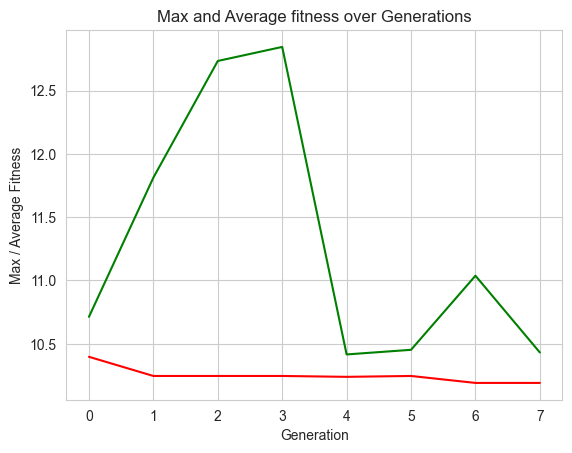

In [11]:
STRATEGIES = [
    LeftmostOutermostStrategy(),
    RightmostInnermostStrategy(),
    LeftmostInnermostStrategy(),
    RightmostOutermostStrategy(),
    RandomStrategy(),
]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [
    1.0,
    1.0,
    1.0,
    1.0,
]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register(
        "hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i]
    )

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (
        toolbox.__getattribute__("hyperparameter_" + str(i)),
    )


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [
        sum(
            [
                term.normalize(MixedStrategy(STRATEGIES, p))[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    print(
        "expected number of steps to normalize using Mixed strategy= {}".format(result)
    )
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return (result,)


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register(
    "mate",
    tools.cxSimulatedBinaryBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
)
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
    indpb=1.0 / NUM_OF_PARAMS,
)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color="red")
plt.plot(meanFitnessValues, color="green")
plt.xlabel("Generation")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average fitness over Generations")
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 37.84it/s]


number of not normalized terms: 1
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.034034  1077.632499 -775.791812     inf      0.043847   
chi2             0.035961  1110.100877 -770.338366     inf      0.070689   
gamma            0.035961  1110.096630 -770.337942     inf      0.070692   
rayleigh         0.048941  1288.287859 -744.424313     inf      0.175652   
exponpow         0.058099  1064.586978 -722.846115     inf      0.138006   

          ks_pvalue  
lognorm    0.986914  
chi2       0.678900  
gamma      0.678862  
rayleigh   0.003839  
exponpow   0.041673  
{'lognorm': {'s': 0.6921209649425412, 'loc': -0.11688390860367712, 'scale': 8.200774240271802}}
Norm distribution: (10.392929292929292, 8.810794602091972)


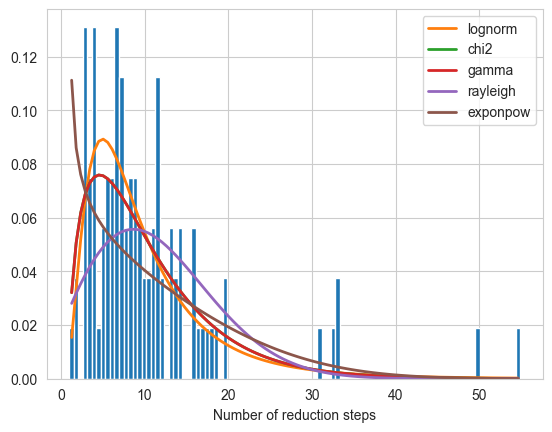

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.11it/s]

Log Norm distribution params: (2.085856905233589, 0.705081063103935); expected value = 10.323538281309046


In [12]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 40.39it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.004864  1447.602434 -979.282553     inf      0.098727   
chi2             0.009856  1463.253427 -908.673048     inf      0.162248   
exponpow         0.014895  1221.677963 -867.374961     inf      0.325829   
powerlaw         0.021444  1163.177065 -830.934062     inf      0.333239   
rayleigh         0.027857  1946.023058 -809.372766     inf      0.343753   

             ks_pvalue  
lognorm   2.659797e-01  
chi2      9.094845e-03  
exponpow  5.932379e-10  
powerlaw  2.114922e-10  
rayleigh  4.683069e-11  
{'lognorm': {'s': 1.1072632027187028, 'loc': 0.42540421663581984, 'scale': 5.861707468060584}}
Norm distribution: (11.862000000000002, 20.432370298132323)


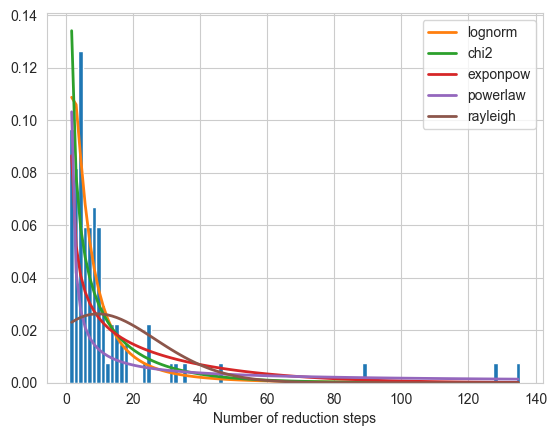

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.87it/s]

Log Norm distribution params: (1.883877253687777, 0.994366592591052); expected value = 10.786115594217124


In [13]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(steps)

In [15]:
def draw_2d_distribution(ax, x, y, xlabel, ylabel):
    ax.scatter(x, y, color="blue")
    ax.set(
        title="Distribution of " + xlabel.lower() + "-" + ylabel.lower(),
        xlabel=xlabel,
        ylabel=ylabel,
    )
    ax.legend(prop={"size": 10})


def draw_2d_strategy_distribution(ax, x, y, xlabel, ylabel):
    x = list(map(lambda v: -1 if v == float("inf") else v, x))
    y = list(map(lambda v: -1 if v == float("inf") else v, y))
    greater = list(
        zip(
            *list(
                filter(lambda z: z[0] >= z[1] and z[0] != -1 and z[1] != -1, zip(x, y))
            )
        )
    )
    less = list(
        zip(
            *list(
                filter(lambda z: z[0] < z[1] and z[0] != -1 and z[1] != -1, zip(x, y))
            )
        )
    )
    inf_x = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] != -1, zip(x, y)))))
    inf_y = list(zip(*list(filter(lambda z: z[0] != -1 and z[1] == -1, zip(x, y)))))
    inf_xy = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] == -1, zip(x, y)))))
    ax.scatter(
        greater[0], greater[1], color="blue", label="{} <= {}".format(ylabel, xlabel)
    )
    ax.scatter(less[0], less[1], color="red", label="{} < {}".format(xlabel, ylabel))
    if inf_x:
        ax.scatter(
            inf_x[0],
            inf_x[1],
            color="lime",
            label="{} doesn't normalize".format(xlabel),
        )
    if inf_y:
        ax.scatter(
            inf_y[0],
            inf_y[1],
            color="yellow",
            label="{} dooesn't normalize".format(ylabel),
        )
    if inf_xy:
        ax.scatter(
            inf_xy[0],
            inf_xy[1],
            color="orange",
            label="Both strategies don't normalize",
        )
    ax.set(
        title="Distribution of " + xlabel.lower() + "-" + ylabel.lower(),
        xlabel=xlabel,
        ylabel=ylabel,
    )
    ax.legend(prop={"size": 10})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


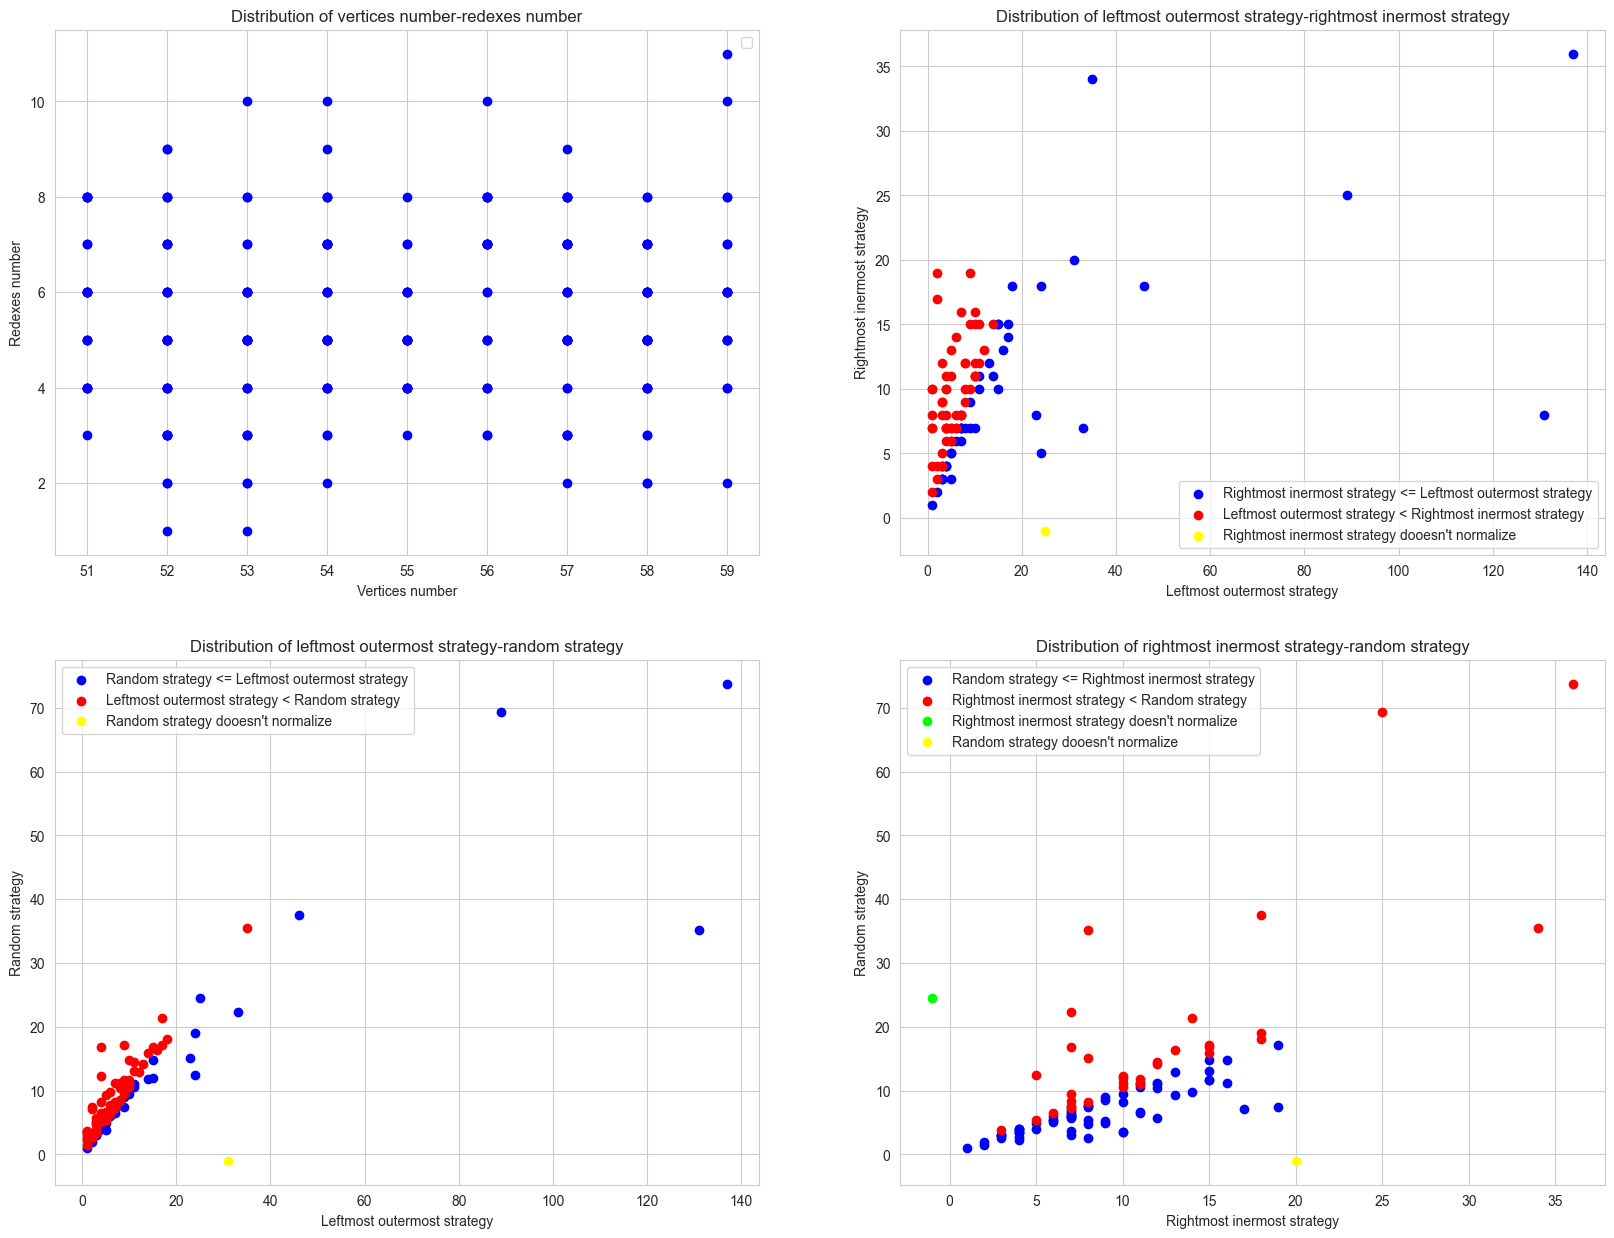

In [16]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(
    ax0, countVertices, countRedexes, "Vertices number", "Redexes number"
)
draw_2d_strategy_distribution(
    ax1, stepsLO, stepsRI, "Leftmost outermost strategy", "Rightmost inermost strategy"
)
draw_2d_strategy_distribution(
    ax2, stepsLO, stepsRand, "Leftmost outermost strategy", "Random strategy"
)
draw_2d_strategy_distribution(
    ax3, stepsRI, stepsRand, "Rightmost inermost strategy", "Random strategy"
)
plt.show()

In [17]:
def draw_plot(x, y, z, q, labels, colors):
    x = list(map(lambda v: -1 if v == float("inf") else v, x))
    y = list(map(lambda v: -1 if v == float("inf") else v, y))
    z = list(map(lambda v: -1 if v == float("inf") else v, z))
    q = list(map(lambda v: -1 if v == float("inf") else v, q))

    data = pd.DataFrame(zip(x, y, z, q), columns=labels)
    ax0 = data.plot(figsize=(20, 10), kind="bar", color=colors)
    ax0.set(
        title="Distribution of number of reduction steps for each term",
        xlabel="Term index",
        ylabel="Number of reduction steps",
    )
    ax0.legend(prop={"size": 10})
    plt.show()
    return ax0

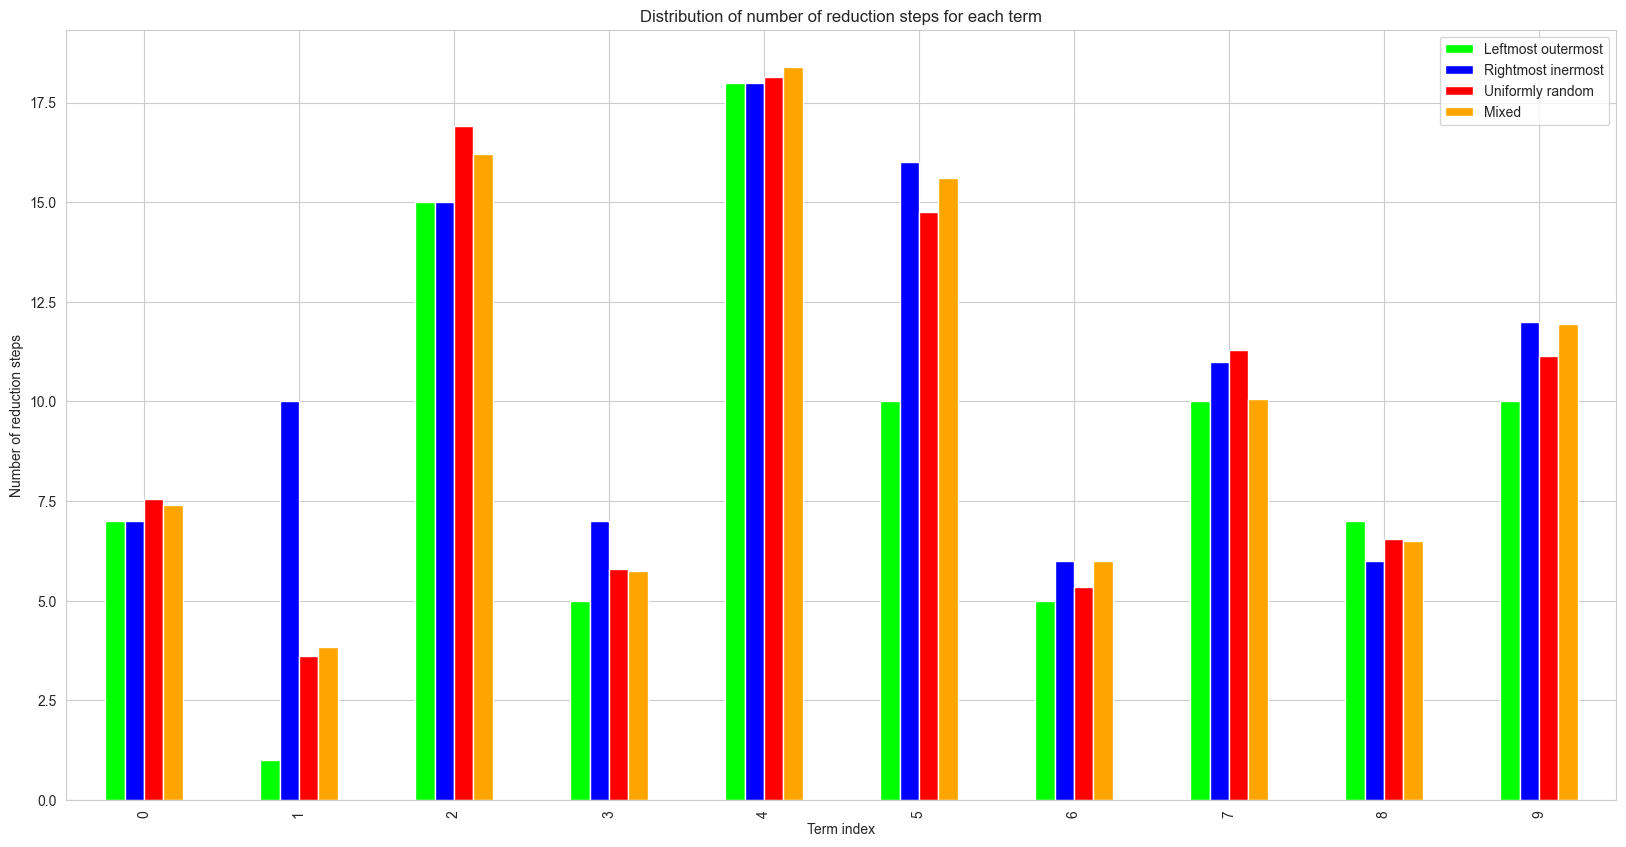

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [18]:
colors = ["lime", "blue", "red", "orange"]
labels = ["Leftmost outermost", "Rightmost inermost", "Uniformly random", "Mixed"]
n = 20
draw_plot(
    stepsLO[10:n],
    stepsRI[10:n],
    stepsRand[10:n],
    MixedStrategySteps[10:n],
    labels,
    colors,
)

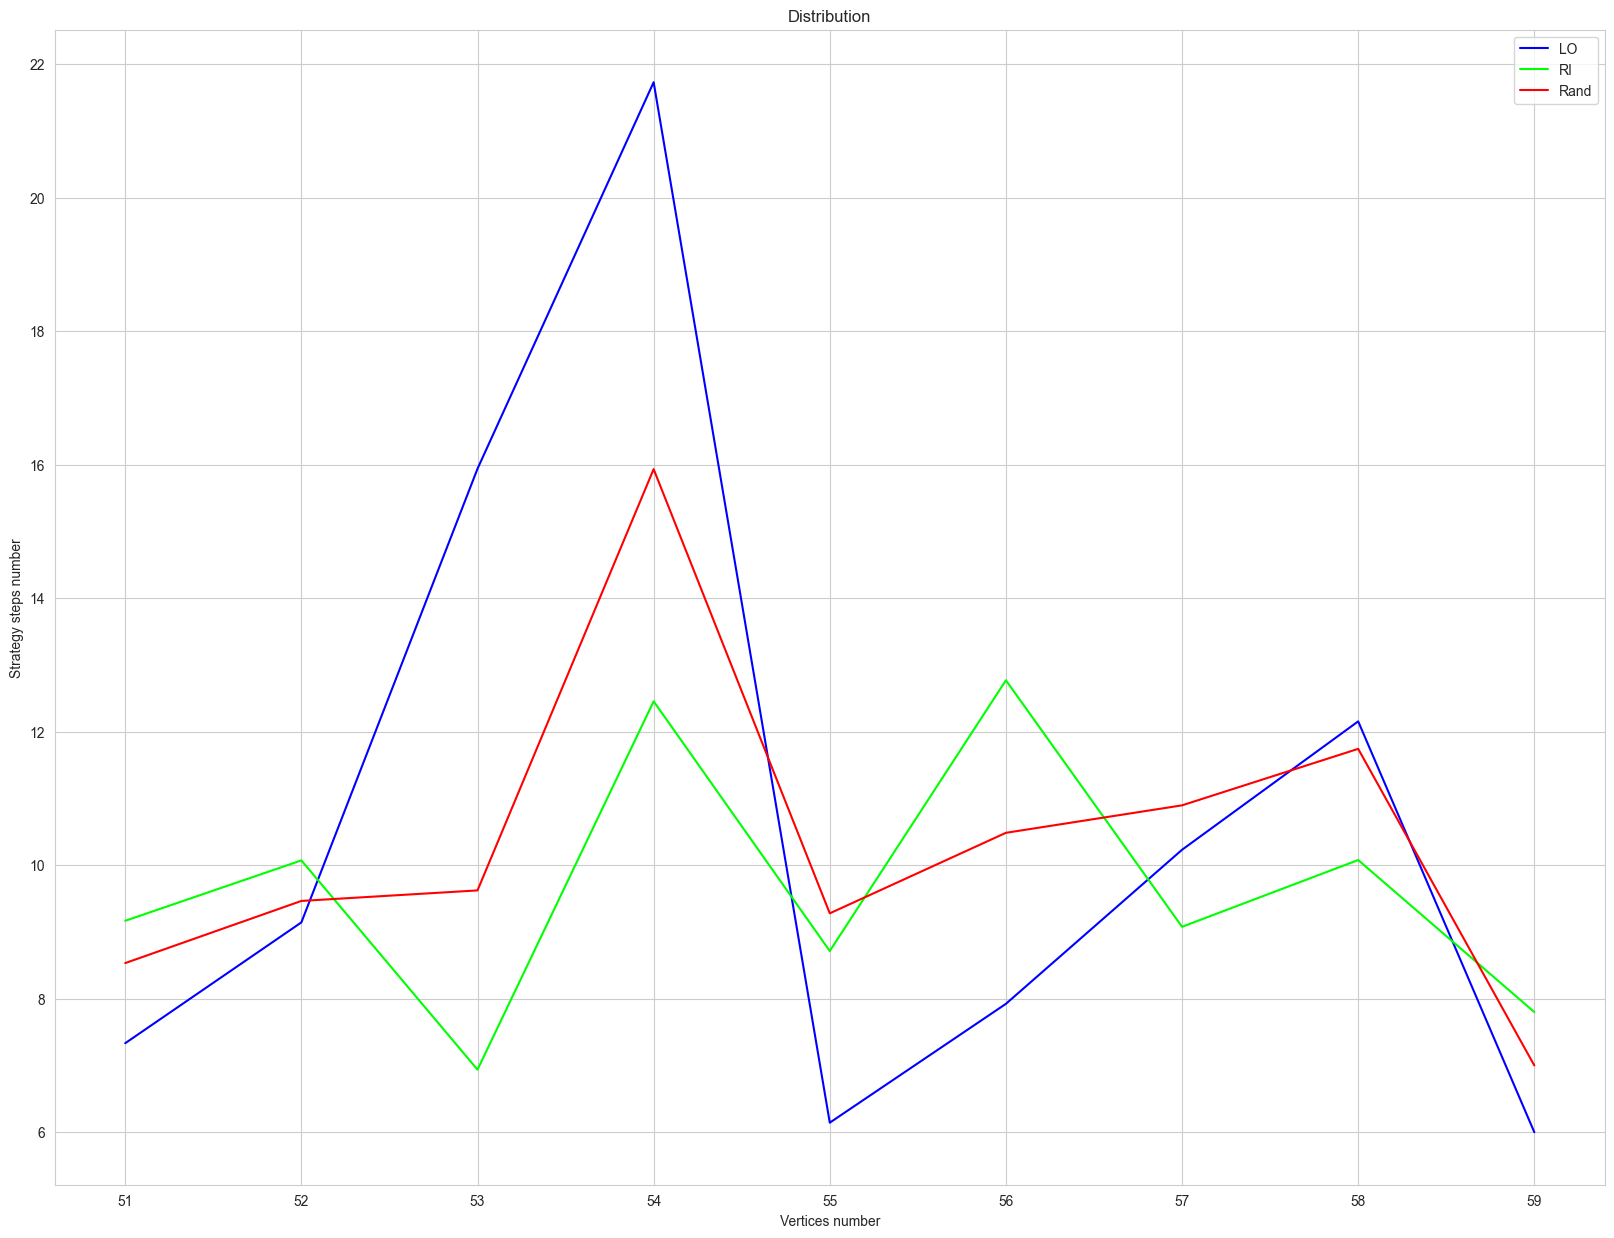

In [19]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append(
        (term, {"LO": stepsLO[i], "RI": stepsRI[i], "Rand": stepsRand[i]})
    )

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [
        d[1]
        for d in data
        if d[1]["LO"] != float("inf")
        and d[1]["RI"] != float("inf")
        and d[1]["Rand"] != float("inf")
    ]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d["LO"]
        avgRI += d["RI"]
        avgRand += d["Rand"]

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {
            "LO": avgLO / count,
            "RI": avgRI / count,
            "Rand": avgRand / count,
        }

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(
    list(average_term_data.keys()),
    [data["LO"] for i, data in average_term_data.items()],
    color="blue",
    label="LO",
)
ax.plot(
    list(average_term_data.keys()),
    [data["RI"] for i, data in average_term_data.items()],
    color="lime",
    label="RI",
)
ax.plot(
    list(average_term_data.keys()),
    [data["Rand"] for i, data in average_term_data.items()],
    color="red",
    label="Rand",
)
ax.set(title="Distribution", xlabel="Vertices number", ylabel="Strategy steps number")
ax.legend(prop={"size": 10})

plt.show()

## TESTS

In [20]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX), Abstraction(x, Application(Abstraction(y, Z), XZ)))

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((λq.((q q) q)) (λq.((λw.e) (q e))))
	v[87933456]: {'free': 0, 'bound': 4}
	v[87933458]: {'free': 2, 'bound': 0}


In [21]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(
    x,
    Abstraction(
        y,
        Application(
            Application(
                Abstraction(z, Application(Atom(y), Atom(z))),
                Application(Abstraction(w, Atom(w)), Atom(w)),
            ),
            Atom(v),
        ),
    ),
)


def testTerm():
    assert len(lambdaTerm.redexes) == 2
    assert lambdaTerm.verticesNumber == 13

    subterm = Application(Atom(y), Atom(z))
    assert lambdaTerm.subterm(1) == lambdaTerm
    assert lambdaTerm.subterm(6) == subterm
    assert lambdaTerm.setSubterm(1, subterm) == subterm

    assert (
        lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber
    )
    assert len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes)

    strategy = LeftmostOutermostStrategy()
    assert len(lambdaTerm._betaConversion(strategy).redexes) == 1
    assert lambdaTerm._betaConversion(strategy).verticesNumber == 10

    assert len(lambdaTerm.normalize(strategy)[0].redexes) == 0
    assert lambdaTerm.normalize(strategy)[1] == 2


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert strategy.redexIndex(lambdaTerm) == 4


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 38.64it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.007942  1453.151720 -930.258998     inf      0.100793   
chi2             0.014955  1513.291338 -866.971128     inf      0.223233   
exponpow         0.020510  1150.511439 -835.387744     inf      0.374335   
powerlaw         0.025364  1185.155978 -814.144519     inf      0.374020   
rayleigh         0.031280  1947.071090 -797.783309     inf      0.347275   

             ks_pvalue  
lognorm   2.446723e-01  
chi2      7.373430e-05  
exponpow  4.322175e-13  
powerlaw  4.546131e-13  
rayleigh  2.793236e-11  
{'lognorm': {'s': 1.110302435699274, 'loc': 0.42024585286616845, 'scale': 5.842401853195845}}
Norm distribution: (11.89, 20.726261119652044)


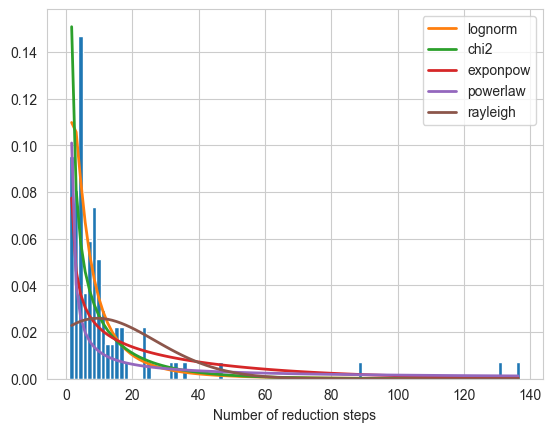

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.34it/s]

Log Norm distribution params: (1.879940211204093, 0.9977012908624534); expected value = 10.779478030134486


In [22]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 38.09it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.007942  1453.151720 -930.258998     inf      0.100793   
chi2             0.014955  1513.291338 -866.971128     inf      0.223233   
exponpow         0.020510  1150.511439 -835.387744     inf      0.374335   
powerlaw         0.025364  1185.155978 -814.144519     inf      0.374020   
rayleigh         0.031280  1947.071090 -797.783309     inf      0.347275   

             ks_pvalue  
lognorm   2.446723e-01  
chi2      7.373430e-05  
exponpow  4.322175e-13  
powerlaw  4.546131e-13  
rayleigh  2.793236e-11  
{'lognorm': {'s': 1.110302435699274, 'loc': 0.42024585286616845, 'scale': 5.842401853195845}}
Norm distribution: (11.89, 20.726261119652044)


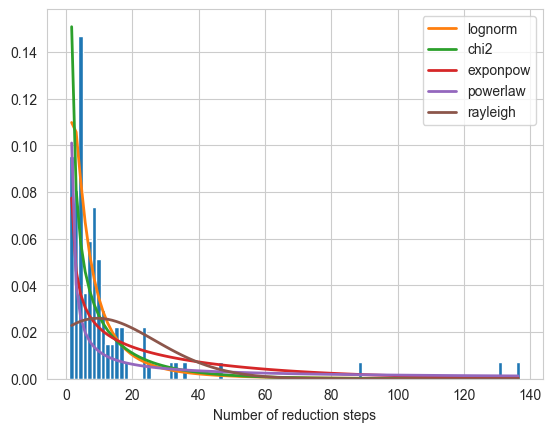

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.73it/s]

Log Norm distribution params: (1.879940211204093, 0.9977012908624534); expected value = 10.779478030134486


In [23]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)